# 01_Heart Disease Diagnosis

The goal of this assignment is to build a model for the decision support system that will help cardiologists to diagnose heart disease ('target' - column 13 of the dataset) in their patients. 

The following variables (from column 0 to column 12 of the dataset) will be used: 
- age; 
- sex; 
- chest pain type (cp);
- resting blood pressure (trestbps);
- serum cholestoral in mg/dl (chol);
- fasting blood sugar (fbs);
- resting electrocardiographic results (restecg);
- maximum heart rate achieved (thalach);
- exercise induced angina (exang);
- ST depression induced by exercise relative to rest (oldpeak);
- the slope of the peak exercise ST (slope);
- number of major vessels (ca);
- heart rate (thal).

## 0. Preliminary stage

### 0.1 Activating the working directory:

In [1]:
cd D:\SciKitDatasets\misc

D:\SciKitDatasets\misc


### 0.2 Importing the necessary libraries:

In [2]:
import pandas as pd #Pandas
import matplotlib.pyplot as plt #Matplotlib

from sklearn.linear_model import LogisticRegression #Logistic regression srcipt from sklearn package
from sklearn.ensemble import RandomForestClassifier #Random Forest srcipt from sklearn package
from sklearn.model_selection import train_test_split #Splitting the data into train and test datasets
from sklearn.feature_selection import RFECV #Recursive feature elimination and cross-validation script 
                                            #from sklearn package
from sklearn.tree import export_graphviz #Visualizing decicion trees

import numpy as np #NumPy

import seaborn as sns #Seaborn package for more advanced visualization
sns.set(style="white") #White background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

%matplotlib inline

In [3]:
#Ignoring unnecessary warnings
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

In [4]:
#Displaying images within the notebook:
from IPython.display import Image

from subprocess import call

#Script for displaying multiple tables in one row:
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

### 0.3 Uploading the dataset file heart.csv into a pandas dataframe, assigning the name df_full to it: 

Dataset source: https://www.kaggle.com/ronitf/heart-disease-uci/downloads/heart-disease-uci.zip/1

In [5]:
df_full = pd.read_csv('D:\\SciKitDatasets\\misc\\heart.csv')

### 0.4 Reviewing the full dataset, and noting that it consists of 303 rows and 14 columns:

In [6]:
df_full

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### 0.5 Having a look at the overall description of the numercial variables of the dataset: 

Here we discover that there are no missing values in the dataset, as the figure for the 'count' row in the dataset description - 303 - equals that of the overall number of rows in the actual dataset. In addition, all variables in the dataset are numerical, as the number of columns in the dataset decription is exactly the same as the columns' number of the dataset - 14.

In [7]:
df_full.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 1. Exploratory data analysis

### 1.1 Exploration of 'age' variable:

<Figure size 1080x432 with 0 Axes>

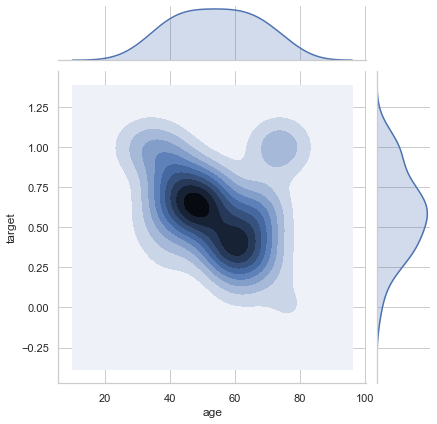

In [8]:
plt.figure(figsize=(15,6))
avg_positive_byage = df_full[["age", "target"]].groupby(['age'], as_index=False).mean()
g = sns.jointplot(x='age', y='target', data=avg_positive_byage, kind="kde")
plt.show()

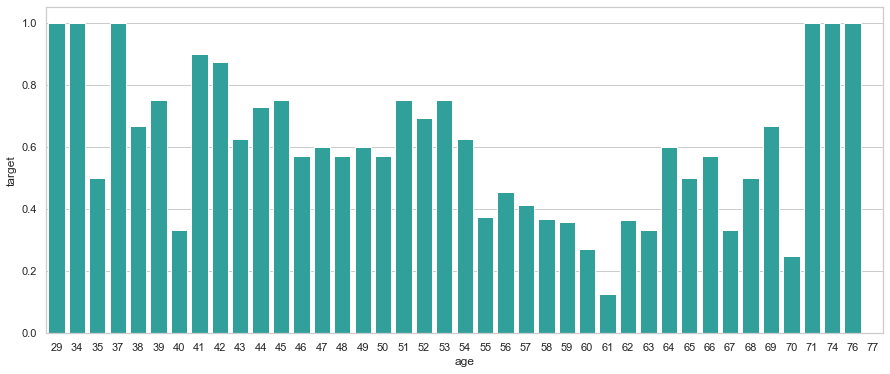

In [9]:
plt.figure(figsize=(15,6))
avg_positive_byage = df_full[["age", "target"]].groupby(['age'], as_index=False).mean()
g = sns.barplot(x='age', y='target', data=avg_positive_byage, color="LightSeaGreen")
plt.show()

The distribution of 'age' variable is obviously very diverse, and unlikely to be a good predictor.

### 1.2 Exploration of 'sex' variable:

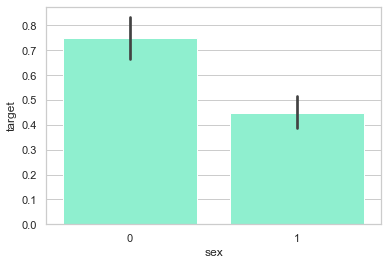

In [10]:
sns.barplot('sex', 'target', data=df_full, color="aquamarine")
plt.show()

Sex '0' has a heart disease ~40% more often than sex '1'. Most likely, sex '0' is male, as males have heart attacks almost twice more often than women [1].

[1] Throughout life, heart attacks are twice as common in men than women https://www.health.harvard.edu/heart-health/throughout-life-heart-attacks-are-twice-as-common-in-men-than-women

### 1.3 Exploration of 'chest pain type' (cp) variable:

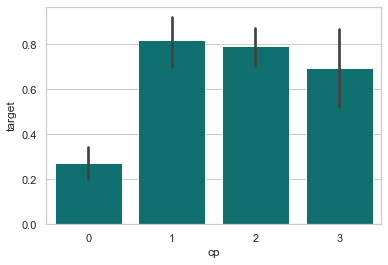

In [11]:
sns.barplot('cp', 'target', data=df_full, color="teal")
plt.show()

Here we see that those people who have heart diseases are likely to have chest pain of some kind (1-3), rather than no chest pain at all. So it might be reasonable to binarize this feature by creating a new one - 'cp_bin' - that will have only values 0 (no pain) and 1 (pain is present), because there's very little difference in predictive power among values 1-3 in the original 'cp' feature.

In [12]:
df_full['cp_bin']=np.where(df_full['cp']<1, 0, 1)

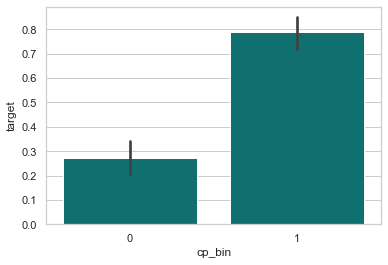

In [13]:
sns.barplot('cp_bin', 'target', data=df_full, color="teal")
plt.show()

### 1.4 Exploration of 'resting blood pressure' (trestbps) variable:

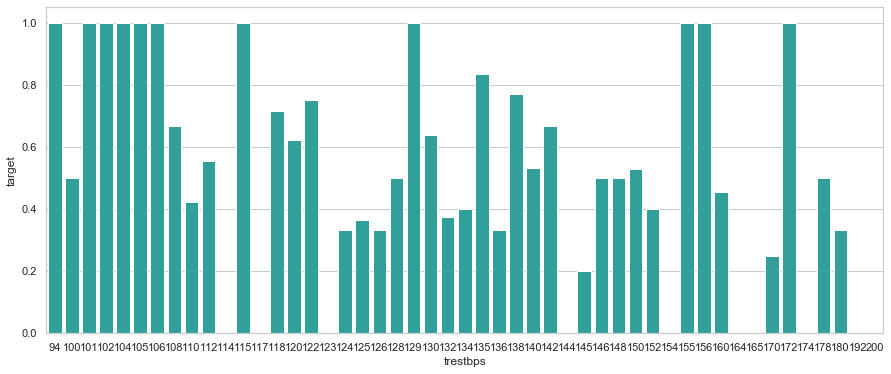

In [14]:
plt.figure(figsize=(15,6))
avg_positive_bytrestbps = df_full[["trestbps", "target"]].groupby(['trestbps'], as_index=False).mean()
g = sns.barplot(x='trestbps', y='target', data=avg_positive_bytrestbps, color="LightSeaGreen")
plt.show()

The distribution of this variable is too diverse to be a good predictor.

### 1.5 Exploration of 'serum cholestoral in mg/dl' (chol) variable: 

<Figure size 1080x432 with 0 Axes>

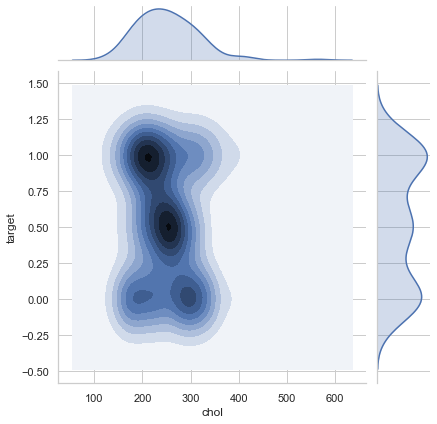

In [15]:
plt.figure(figsize=(15,6))
avg_positive_bychol = df_full[["chol", "target"]].groupby(['chol'], as_index=False).mean()
g = sns.jointplot(x='chol', y='target', data=avg_positive_bychol, kind="kde")
plt.show()

Seems like the cholesterol level of most people with heart diseases from this dataset is between 200 and 300 mg. In order to get a better predictive feature out of this one, it might be reasonable to create a new one - 'chol<200'. 

In [16]:
df_full['chol<200']=np.where(df_full['chol']<200, 1, 0)

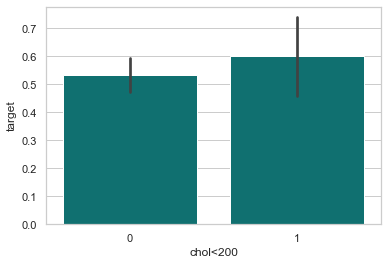

In [17]:
sns.barplot('chol<200', 'target', data=df_full, color="teal")
plt.show()

### 1.6 Exploration of 'fasting blood sugar' (fbs) variable: 

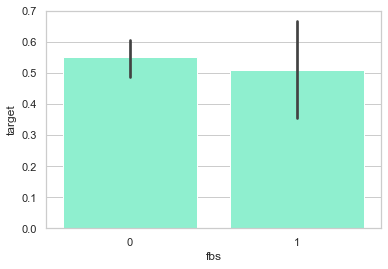

In [18]:
sns.barplot('fbs', 'target', data=df_full, color="aquamarine")
plt.show()

Distribution of 'fbs' is too even to be a good predictor.

### 1.7 Exploration of 'resting electrocardiographic results (restecg)' variable:

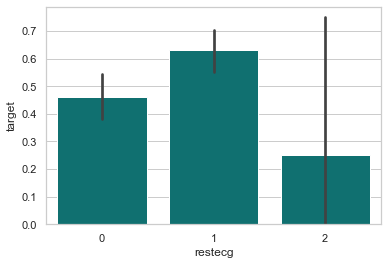

In [19]:
sns.barplot('restecg', 'target', data=df_full, color="teal")
plt.show()

Least number of patients have restcg type 2, but this group has the highest number of heart disease cases.

### 1.8 Exploration of 'maximum heart rate achieved' (thalach) variable:

<Figure size 1080x432 with 0 Axes>

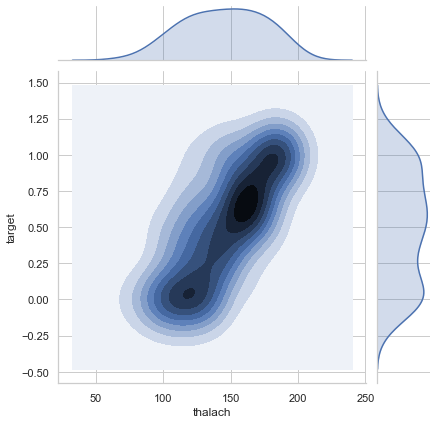

In [20]:
plt.figure(figsize=(15,6))
avg_positive_bythalach = df_full[["thalach", "target"]].groupby(['thalach'], as_index=False).mean()
g = sns.jointplot(x='thalach', y='target', data=avg_positive_bythalach, kind="kde")
plt.show()

It is obvious that there is a high concentration of positive diagnoses for those with rate above ~150, so it is reasonable to create a new binary feature that will break all values into two groups - higher and below 140. 

In [21]:
df_full['hr>140']=np.where(df_full['thalach']>140, 1, 0)

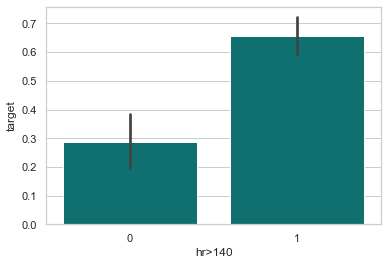

In [22]:
sns.barplot('hr>140', 'target', data=df_full, color="teal")
plt.show()

### 1.9 Exploration of 'exercise induced angina' (exang) variable:

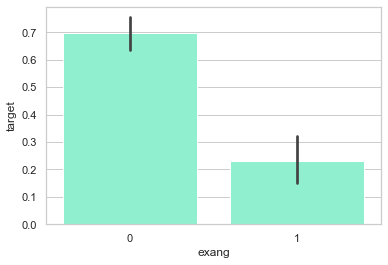

In [23]:
sns.barplot('exang', 'target', data=df_full, color="aquamarine")
plt.show()

### 1.10 Exploration of 'ST depression induced by exercise relative to rest' (oldpeak) variable: 

<Figure size 1080x432 with 0 Axes>

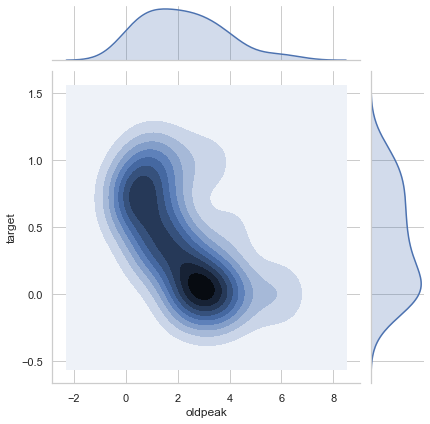

In [24]:
plt.figure(figsize=(15,6))
avg_positive_byoldpeak = df_full[["oldpeak", "target"]].groupby(['oldpeak'], as_index=False).mean()
g = sns.jointplot(x='oldpeak', y='target', data=avg_positive_byoldpeak, kind="kde")
plt.show()

There is a high concentration of vaues in the 2-4 range, so a new binary feature might be useful.

In [25]:
df_full['oldpeak<2']=np.where(df_full['oldpeak']<2, 1, 0)

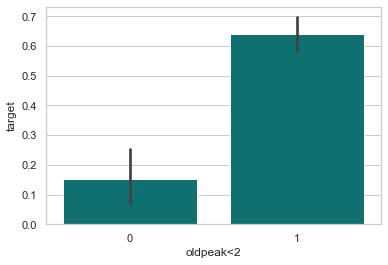

In [26]:
sns.barplot('oldpeak<2', 'target', data=df_full, color="teal")
plt.show()

### 1.11 Exploration of 'the slope of the peak exercise ST' (slope) variable: 

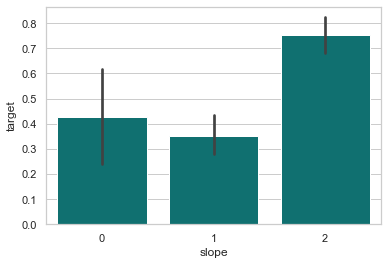

In [27]:
sns.barplot('slope', 'target', data=df_full, color="teal")
plt.show()

### 1.12 Exploration of 'number of major vessels' (ca) variable:

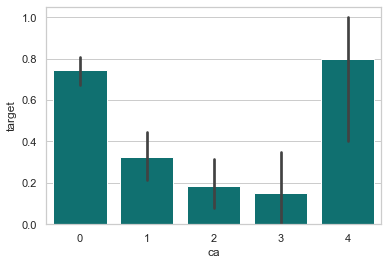

In [28]:
sns.barplot('ca', 'target', data=df_full, color="teal")
plt.show()

Turning this feature into a binary one by condencing it into two groups - 0 and (1-3) might have a positive effect on its predictive power.

In [29]:
df_full['ca<=3']=np.where(df_full['oldpeak']<=3, 1, 0)

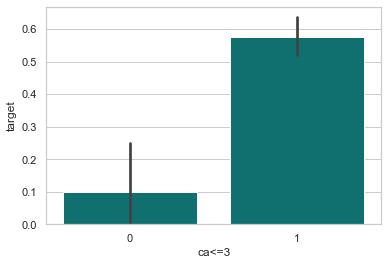

In [30]:
sns.barplot('ca<=3', 'target', data=df_full, color="teal")
plt.show()

### 1.13 Exploration of 'heart rate' (thal) variable: 

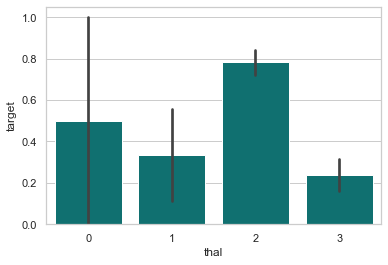

In [31]:
sns.barplot('thal', 'target', data=df_full, color="teal")
plt.show()

## 2. Initial models

### 2.1 Preparing train and test data 

In [32]:
feature_cols = ['age', 'sex', 'cp', 'cp_bin', 'trestbps', 'hr>140', 'chol', 'fbs', 'chol<200', 'oldpeak<2','restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'ca<=3', 'thal']
X = df_full[feature_cols] #Features
y = df_full.target #Target variable

70 to 30 train-test ratio has been chosen as optimal due to dataset's small size [2].

[2] How to choose the training, cross-validation, and test set sizes for small sample-size data? https://stats.stackexchange.com/questions/113994/how-to-choose-the-training-cross-validation-and-test-set-sizes-for-small-sampl

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

X = X_train
y = y_train

Since the basis of the decision support system in this case is binary classification, Logistic Regression and Random Forest have been chosen as two of the most popular and reliable classification tools. According to general statistics, Random Forest is expected to perform slightly better than Logistic Regression [3].

[3] Random forest versus logistic regression: a large-scale benchmark experiment https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-018-2264-5

### 2.2 Logistic Regression - the initial model

####  2.2.1 Feature ranking with recursive feature elimination and cross-validated selection of the best number of features (RFECV)
sklearn.feature_selection.RFECV https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

Optimal number of features: 13
Selected features: ['sex', 'cp', 'cp_bin', 'hr>140', 'fbs', 'chol<200', 'oldpeak<2', 'exang', 'oldpeak', 'slope', 'ca', 'ca<=3', 'thal']


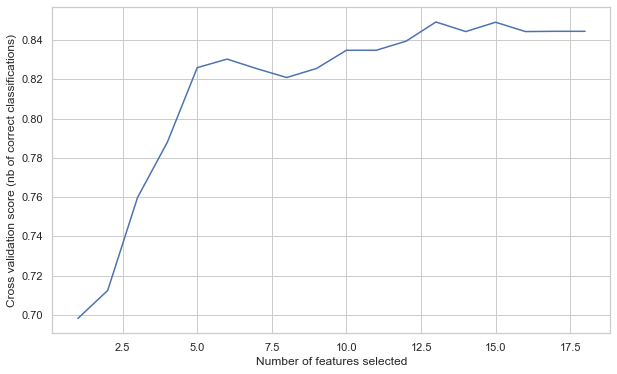

In [34]:
rfecv = RFECV(estimator=LogisticRegression(), step=1, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### 2.2.2 Heatmap of autmatically selected features

The original features which the new binary ones were derived from, were removed in order to avoid artificially high correlations.

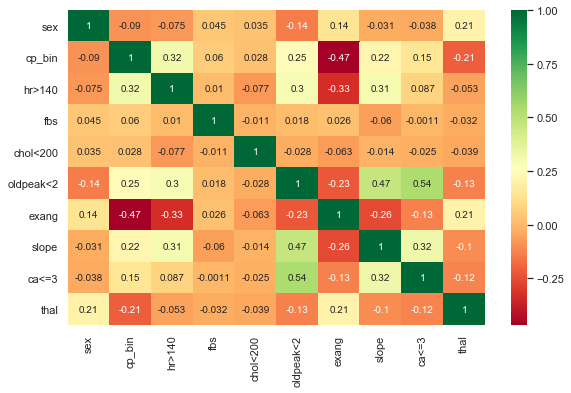

In [35]:
feature_cols = ['sex', 'cp_bin', 'hr>140', 'fbs', 'chol<200', 'oldpeak<2', 'exang', 'slope', 'ca<=3', 'thal']
X_LR = df_full[feature_cols] # Features

fig, ax = plt.subplots(figsize=(8, 5))
plt.tight_layout()
ax = sns.heatmap(X_LR.corr(), annot=True, cmap="RdYlGn")
ax.set_ylim(10.0, 0)
plt.show()

#### 2.2.3 Training and checking accuracy of the initial Logistic Regression model

In [36]:
feature_cols_LR = ['sex', 'cp_bin', 'hr>140', 'fbs', 'chol<200', 'oldpeak<2', 'exang', 'slope', 'ca<=3', 'thal']
X = df_full[feature_cols_LR] # Features
y = df_full.target # Target variable

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

X_1 = X_train
y_1 = y_train

X_2 = X_test
y_2 = y_test

initial_model_LR = LogisticRegression()
# Fit the model to the training data.
initial_model_LR.fit(X_1, y_1)

initial_predictions_LR = initial_model_LR.predict(X_2)

print ('Accuracy:', initial_model_LR.score(X_2, y_2))

Accuracy: 0.7912087912087912


In [37]:
initial_LR_coefs = initial_model_LR.coef_.flatten()
initial_LR_coefs = initial_LR_coefs.tolist()
initial_LR_coefs 

df_initial_LR_coefs = pd.DataFrame({'Feature':feature_cols_LR, 'Coef':initial_LR_coefs}, columns=['Feature','Coef'])
df_initial_LR_coefs = df_initial_LR_coefs.sort_values('Coef', ascending=False)
df_initial_LR_coefs = df_initial_LR_coefs.reset_index(drop=True)
df_initial_LR_coefs

,Feature,Coef
0,cp_bin,1.563122
1,oldpeak<2,1.200524
2,ca<=3,0.550451
3,slope,0.533283
4,hr>140,0.526320
5,chol<200,0.224895
6,thal,-0.753551
7,fbs,-0.800350
8,exang,-0.856072
9,sex,-1.335197


### 2.3 Random Forest - the initial model

#### 2.3.1 Feature ranking with recursive feature elimination and cross-validated selection of the best number of features (RFECV) 

Optimal number of features: 6
Selected features: ['cp_bin', 'hr>140', 'oldpeak<2', 'exang', 'slope', 'thal']


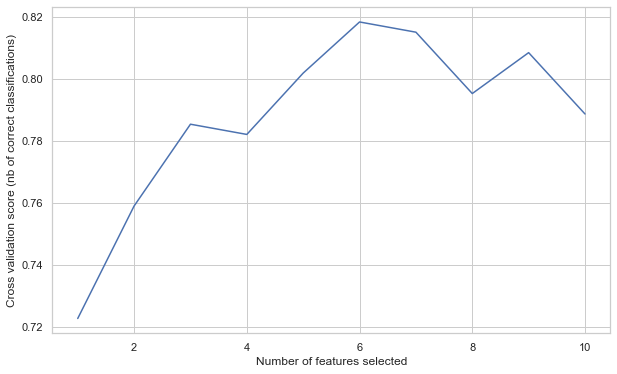

In [45]:
rfecv = RFECV(estimator=RandomForestClassifier(), step=1, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### 2.3.2 Heatmap of autmatically selected features

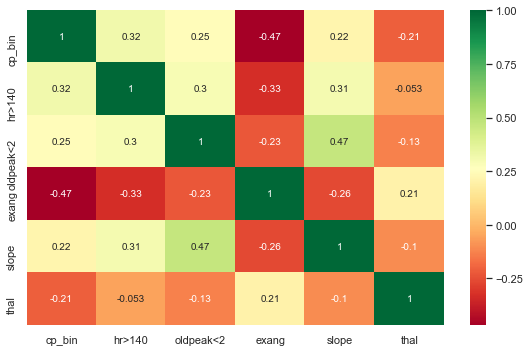

In [46]:
feature_cols = ['cp_bin', 'hr>140', 'oldpeak<2', 'exang', 'slope', 'thal']
X_RF = df_full[feature_cols] # Features

fig, ax = plt.subplots(figsize=(8, 5))
plt.tight_layout()
ax1 = sns.heatmap(X_RF.corr(), annot=True, cmap="RdYlGn")
ax1.set_ylim(6.0, 0)
plt.show()

#### 2.3.3 Training and checking accuracy of the initial Random Forest model

In [47]:
feature_cols_RF =  ['cp_bin', 'hr>140', 'oldpeak<2', 'exang', 'slope', 'thal']
X = df_full[feature_cols_RF] # Features
y = df_full.target # Target variable

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

X_1 = X_train
y_1 = y_train

X_2 = X_test
y_2 = y_test

initial_model_RF = RandomForestClassifier(n_estimators=400,
                                 oob_score=True,
                                 n_jobs=1,
                                 random_state=100,
                                 max_features="auto")
# Fit the model to the training data.
initial_model_RF.fit(X_1, y_1)

initial_predictions_RF = initial_model_RF.predict(X_2)

print ('Accuracy:', initial_model_RF.score(X_2, y_2))

Accuracy: 0.8021978021978022


In [48]:
initial_RF_coefs = initial_model_RF.feature_importances_.flatten()
initial_RF_coefs = initial_RF_coefs.tolist()
initial_RF_coefs 

df_initial_RF_coefs = pd.DataFrame({'Feature':feature_cols_RF, 'Importance':initial_RF_coefs}, columns=['Feature','Importance'])
df_initial_RF_coefs = df_initial_RF_coefs.sort_values('Importance', ascending=False)
df_initial_RF_coefs = df_initial_RF_coefs.reset_index(drop=True)
df_initial_RF_coefs

,Feature,Importance
0,thal,0.312676
1,cp_bin,0.215497
2,slope,0.133348
3,oldpeak<2,0.127833
4,exang,0.124706
5,hr>140,0.085940


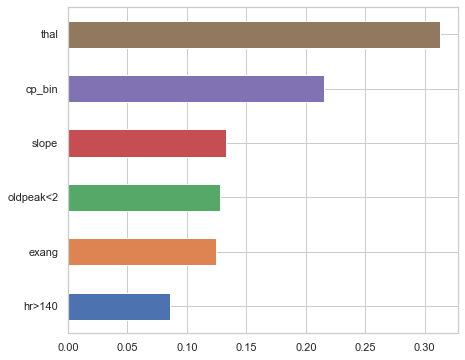

In [49]:
%matplotlib inline

feature_importances = pd.Series(initial_model_RF.feature_importances_, index=X.columns)
feature_importances.sort_values(axis=0, ascending=True, kind='quicksort', na_position='last', inplace=True)
feature_importances.plot(kind="barh", figsize=(7,6));

### 2.4 Comparison of initial models' real performance

    Model  Positive  Negative
0  y_test        47        44
1      LR        54        37
2      RF        51        40


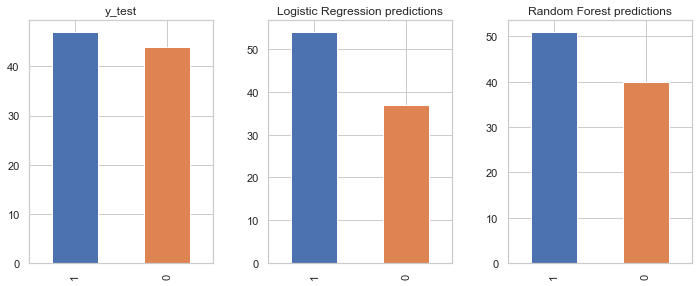

In [50]:
y_2_viz = pd.DataFrame(y_2) 
initial_predictions_LR_viz = pd.DataFrame(initial_predictions_LR, columns = ['target'])
initial_predictions_RF_viz = pd.DataFrame(initial_predictions_RF, columns = ['target'])

y_2_graph_LR = pd.value_counts(y_2_viz['target'])
initial_predictions_LR_graph = pd.value_counts(initial_predictions_LR_viz['target'])
initial_predictions_RF_graph = pd.value_counts(initial_predictions_RF_viz['target'])

models = ['y_test', 'LR', 'RF']
y_res_initial = y_2_graph_LR.tolist()
LR_res_initial = initial_predictions_LR_graph.tolist()
RF_res_initial = initial_predictions_RF_graph.tolist()
lst_initial = [y_res_initial, LR_res_initial, RF_res_initial]
lst_positive_initial = [item[0] for item in lst_initial]
lst_negative_initial = [item[1] for item in lst_initial]
df_results_initial = pd.DataFrame({'Model':models, 'Positive':lst_positive_initial, 'Negative':lst_negative_initial}, 
                          columns=['Model','Positive','Negative'])
print(df_results_initial)

fig, ax = plt.subplots(ncols=3, figsize=(10,4))
fig.tight_layout()
plt.subplots_adjust (left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

plot = y_2_graph_LR.plot.bar(ax=ax[0])
#plot.invert_yaxis()
plot1 = initial_predictions_LR_graph.plot.bar(ax=ax[1])
#plot1.invert_yaxis()
plot2 = initial_predictions_RF_graph.plot.bar(ax=ax[2])
#plot1.invert_yaxis()

plot.title.set_text('y_test')
plot1.title.set_text('Logistic Regression predictions')
plot2.title.set_text('Random Forest predictions')

plt.show()

So the real performance of the initial Logistic Regression model is around 92% (84 correct predictions out of 91), while the real performance of the initial Random Forest model is more than 95% (87/91 correct predicitons). These results were obtained despite the stated accuracy of 79% and 75% for LR and RF respectively. Obviously, accuracy is not always the best model performance indicator [4].

[4] Why you should not trust only in accuracy to measure machine learning performance https://medium.com/@wilamelima/why-you-should-not-trust-only-in-accuracy-to-measure-machine-learning-performance-a72cf00b4516 

## 3. Improved models

The performance levels obtained with the initial models might be not the limit. Certain tweaking can further increase the performance. 

### 3.1 Logistic Regression - the improved model 

For example, the variable 'exang' (section 1.9 of data exploration) showed some very negative correlations with additonal binary variables of 'cp_bin' (section 1.3 of data exploration) and 'hr>140' (section 1.8 of data exploration). The 'cp_bin' and 'hr>140' are supposed to have very strong prediciton power, so the presence of 'exang' in this case might inhibit it. 

In addition, the variable 'fbs' (section 1.6 of data exploration) was automatically selected for the initial LR model, but it's predictive power is obviously weak. It might be reasonable to substitute it with the variable 'restecg' (section 1.7 of data exploration), the predictive power of which is obviously high. 

#### 3.1.1 Heatmap of updated feature set

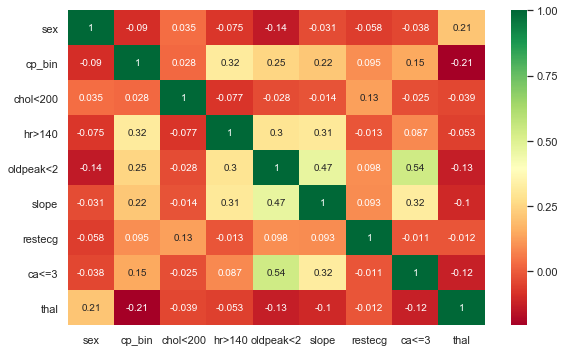

In [51]:
feature_cols = ['sex', 'cp_bin', 'chol<200', 'hr>140', 'oldpeak<2', 'slope', 'restecg', 'ca<=3', 'thal']
X_LR = df_full[feature_cols] # Features

fig, ax = plt.subplots(figsize=(8, 5))
plt.tight_layout()
ax2 = sns.heatmap(X_LR.corr(), annot=True, cmap="RdYlGn")
ax2.set_ylim(9.0, 0.0)
plt.show()

#### 3.1.2 Training and checking accuracy of the imporved Logistic Regression model

In [52]:
feature_cols_LR = ['sex', 'cp_bin', 'chol<200', 'hr>140', 'oldpeak<2', 'slope', 'restecg', 'ca<=3', 'thal']
X = df_full[feature_cols_LR] # Features
y = df_full.target # Target variable

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

X_1 = X_train
y_1 = y_train

X_2 = X_test
y_2 = y_test

improved_model_LR = LogisticRegression()
# Fit the model to the training data.
improved_model_LR.fit(X_1, y_1)

improved_predictions_LR = improved_model_LR.predict(X_2)

print ('Accuracy:', improved_model_LR.score(X_2, y_2))

Accuracy: 0.7802197802197802


#### 3.1.3 Comparing coefficients of improved (left) and initial (right) Logistic Regression models

In [53]:
improved_LR_coefs = improved_model_LR.coef_.flatten()
improved_LR_coefs = improved_LR_coefs.tolist()
improved_LR_coefs 

df_improved_LR_coefs = pd.DataFrame({'Feature':feature_cols_LR, 'Coef':improved_LR_coefs}, columns=['Feature','Coef'])
df_improved_LR_coefs = df_improved_LR_coefs.sort_values('Coef', ascending=False)
df_improved_LR_coefs = df_improved_LR_coefs.reset_index(drop=True)

multi_table([df_improved_LR_coefs, df_initial_LR_coefs])

,Feature,Coef
0,cp_bin,1.709269
1,oldpeak<2,1.087877
2,slope,0.664840
3,hr>140,0.612761
4,ca<=3,0.375417
5,chol<200,0.336016
6,restecg,0.095789
7,thal,-0.802172
8,sex,-1.423541
,Feature,Coef


#### 3.1.4 Interpreting the imporved Logistic Regression model

In [54]:
X_2.head(1)

,sex,cp_bin,chol<200,hr>140,oldpeak<2,slope,restecg,ca<=3,thal
225,1,0,1,0,0,0,1,1,3


In [55]:
y_2.head(1)

225    0
Name: target, dtype: int64

The prediction by a Logistic Regression model is obtained by multiplying the value of each variable by its respective coefficient, summing up these multiplications (sum), and using the p (prediction) value formula - (2.71828(sum))/(1+2.71828(sum)) [5]. 

In case with patient #0, we get the following: 

1) (0*(1.709269)) + (0(1.087877)) + (0(0.66484)) + (0(0.612761)) + (1(0.375417)) + (1(0.336016)) + (1(0.095789)) + (3(-0.802172))+(1(-1.423541)) = -3.022835

2) (2.71828(0.620107))/(1+2.71828(0.620107)) = 0.04640486

Since the Logistic Regression's decision threshold is 0.5 [6], any value smaller than that means negative diagnosis, and that's a correct prediction. 

[5] Understanding Logistic Regression Coefficient Output: Part 4 — Making Predictions http://logisticregressionanalysis.com/909-understanding-logistic-regression-outputpart-4-making-predictions/

[6] Controlling the threshold in Logistic Regression in Scikit Learn https://stackoverflow.com/questions/28716241/controlling-the-threshold-in-logistic-regression-in-scikit-learn

### 3.2 Random Forest - the improved model 

In case with Random Forest, inclusion of three variables with excellent predictive power - 'sex' (section 1.2 of data exploration), 'restecg' (section 1.7 of data exploration) and 'ca<=3' (section 1.12 of data exploration), as well as 'chol<200' (section 1.5 of data exploration) which has decent predicitve power, can seriously improve the model's performance. 

#### 3.2.1 Heatmap of updated feature set

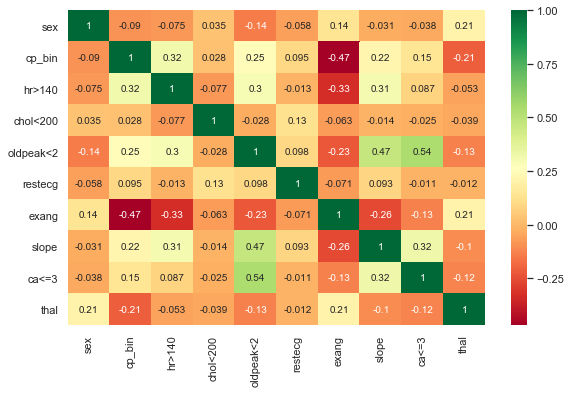

In [56]:
feature_cols = ['sex', 'cp_bin', 'hr>140', 'chol<200', 'oldpeak<2', 'restecg', 'exang', 'slope', 'ca<=3', 'thal']
X_RF = df_full[feature_cols] # Features

fig, ax = plt.subplots(figsize=(8, 5))
plt.tight_layout()
ax3 = sns.heatmap(X_RF.corr(), annot=True, cmap="RdYlGn")
ax3.set_ylim(10.0, 0.0)
plt.show()

#### 3.2.2 Training and checking accuracy of the imporved Random Forest model

In [57]:
feature_cols_RF =  ['sex', 'cp_bin', 'hr>140', 'chol<200', 'oldpeak<2', 'restecg', 'exang', 'slope', 'ca<=3', 'thal']
X = df_full[feature_cols_RF] # Features
y = df_full.target # Target variable

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

X_1 = X_train
y_1 = y_train

X_2 = X_test
y_2 = y_test

improved_model_RF = RandomForestClassifier(n_estimators=400,
                                 oob_score=True,
                                 n_jobs=1,
                                 random_state=100,
                                 max_features="auto")
# Fit the model to the training data.
improved_model_RF.fit(X_1, y_1)

improved_predictions_RF = improved_model_RF.predict(X_2)

print ('Accuracy:', improved_model_RF.score(X_2, y_2))

Accuracy: 0.8021978021978022


#### 3.2.3 Comparing features' importance of improved (left) and initial (right) Random Forest models

In [58]:
improved_RF_coefs = improved_model_RF.feature_importances_.flatten()
improved_RF_coefs = improved_RF_coefs.tolist()
improved_RF_coefs 

df_improved_RF_coefs = pd.DataFrame({'Feature':feature_cols_RF, 'Importance':improved_RF_coefs}, columns=['Feature','Importance'])
df_improved_RF_coefs = df_improved_RF_coefs.sort_values('Importance', ascending=False)
df_improved_RF_coefs = df_improved_RF_coefs.reset_index(drop=True)
multi_table([df_improved_RF_coefs, df_initial_RF_coefs])

,Feature,Importance
0,thal,0.224346
1,cp_bin,0.184624
2,slope,0.113731
3,oldpeak<2,0.102570
4,exang,0.101595
5,sex,0.077530
6,hr>140,0.073087
7,restecg,0.062796
8,chol<200,0.040609
9,ca<=3,0.019113


Feature importance of the improved Random Forest model:

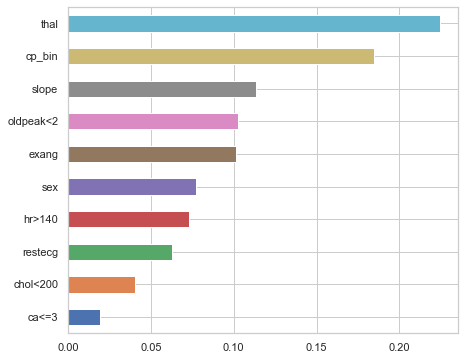

In [59]:
%matplotlib inline

feature_importances = pd.Series(improved_model_RF.feature_importances_, index=X.columns)
feature_importances.sort_values(axis=0, ascending=True, kind='quicksort', na_position='last', inplace=True)
feature_importances.plot(kind="barh", figsize=(7,6));

#### 3.2.4 Interpreting the improved Random Forest model

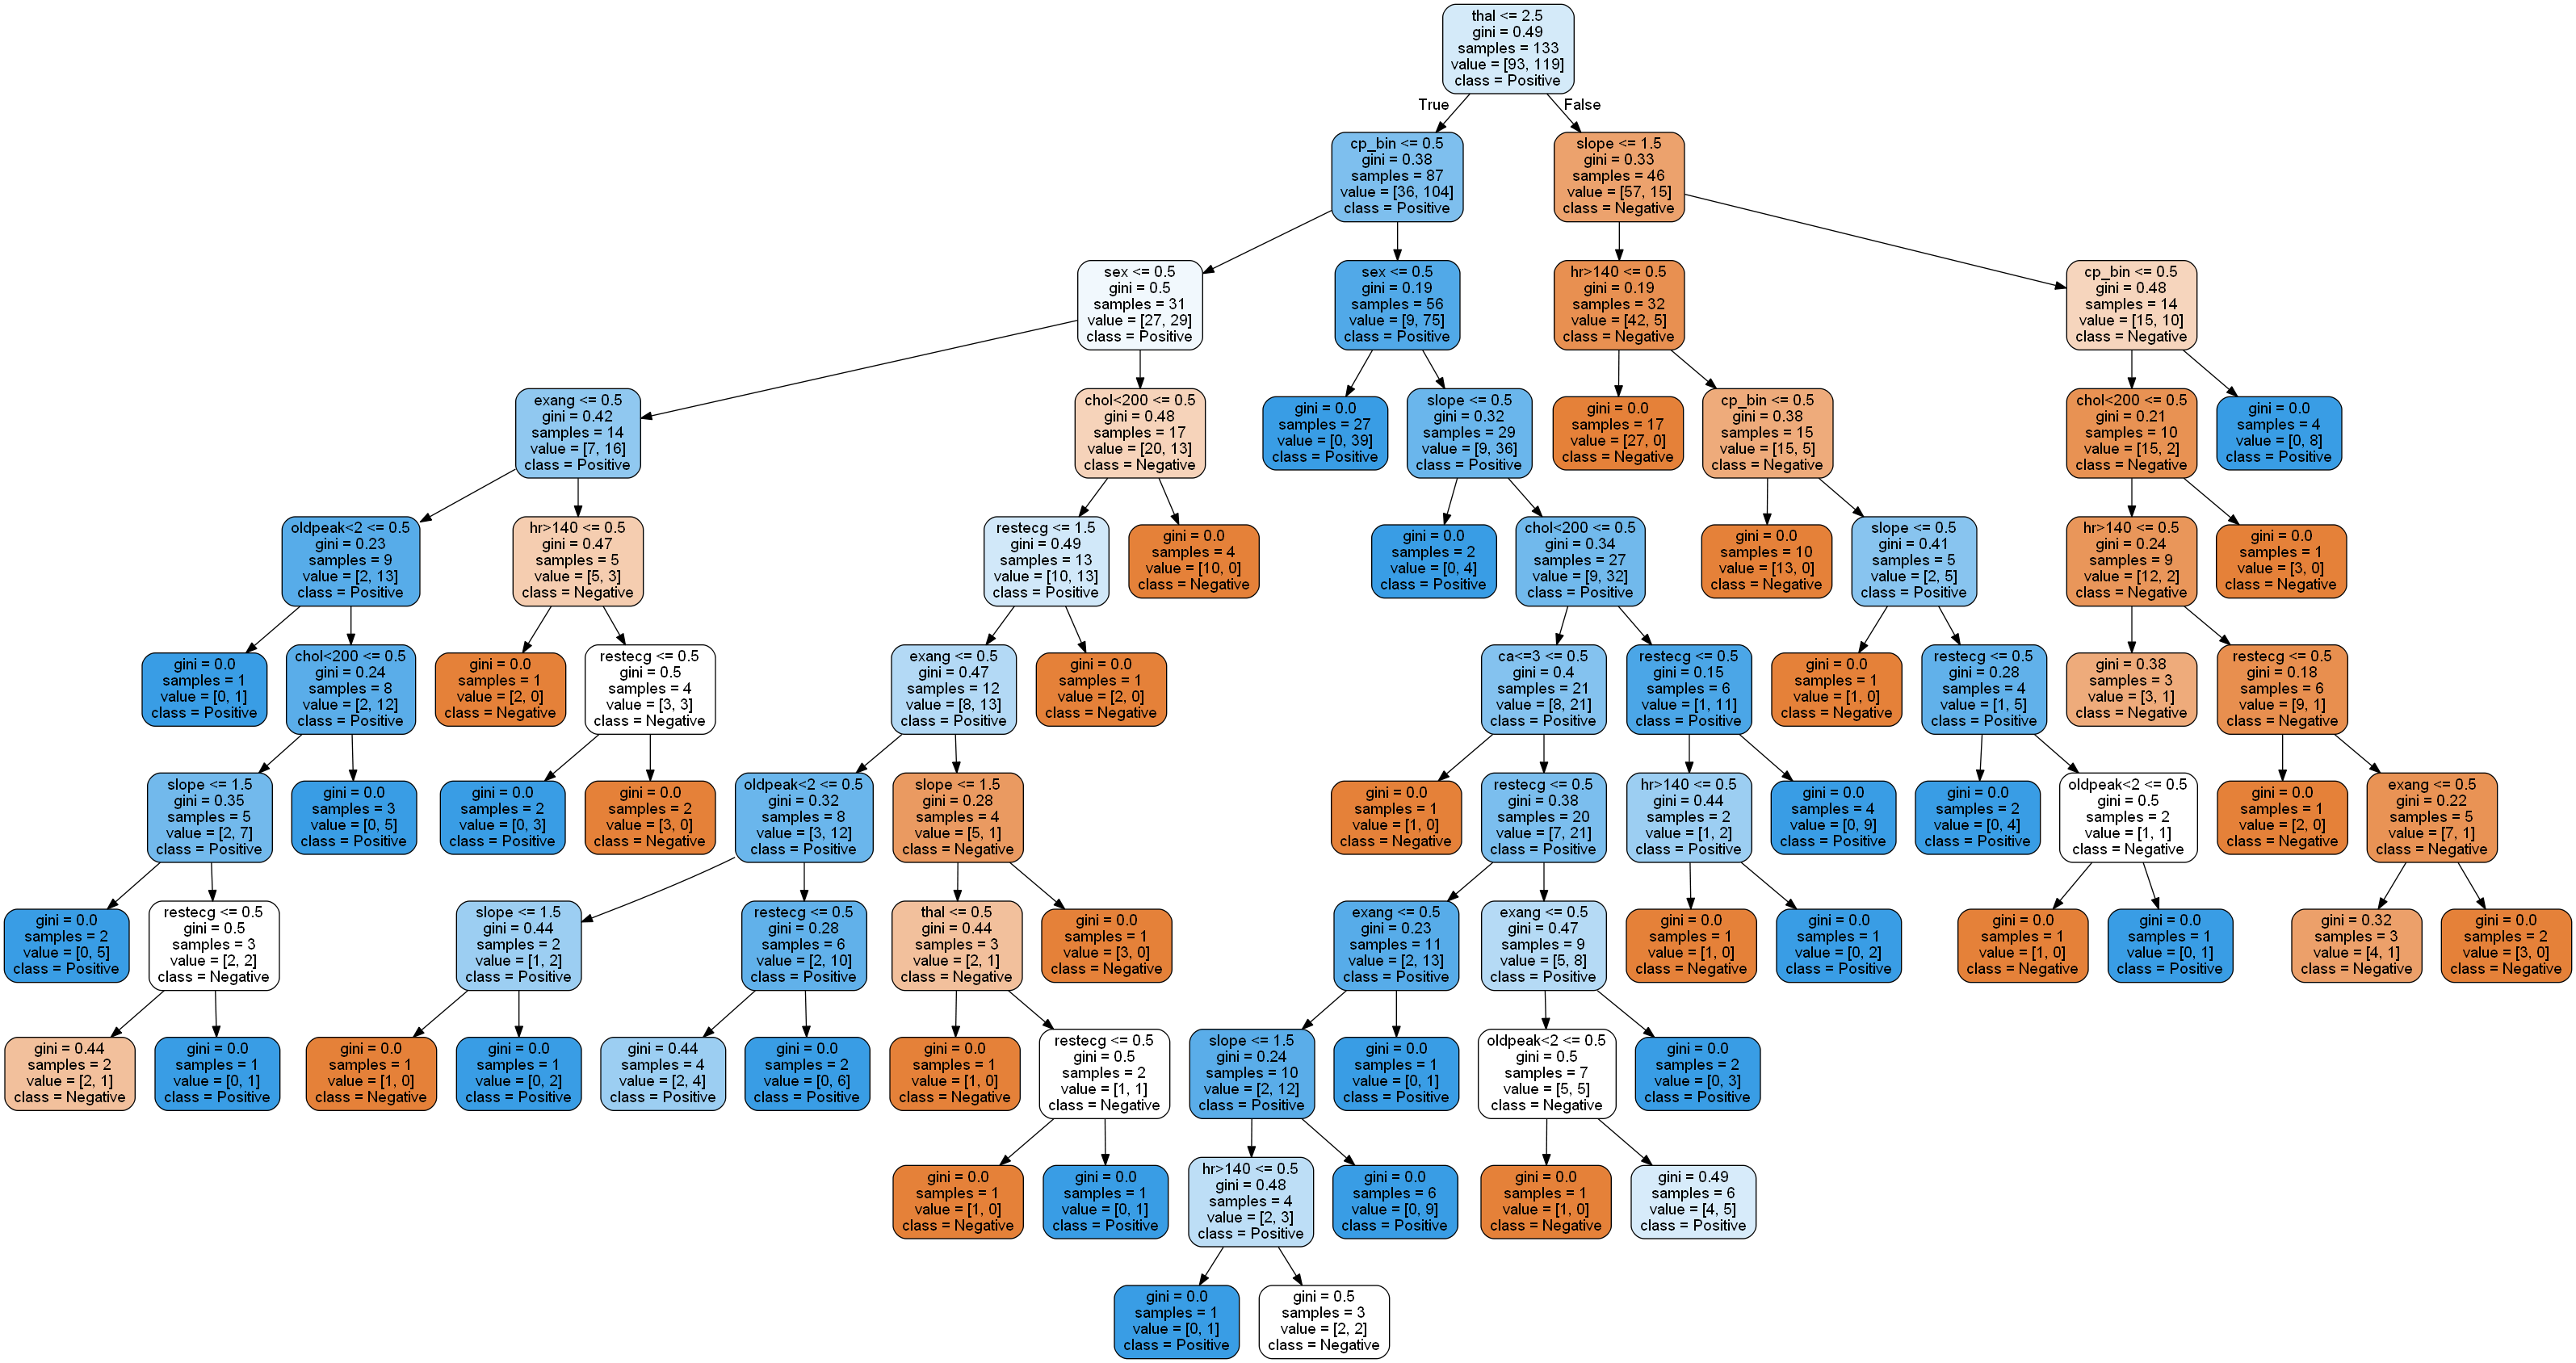

In [60]:
#Visializing the improved RF model's decision tree
estimator_limited = improved_model_RF.estimators_[5]

export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names = X_1.columns.values,
                class_names = ['Negative', 'Positive'], #Classes must be listed in ascending 
                                                        #order - from 0 (Negative) to 1 (Positive)
                rounded = True, proportion = False, precision = 2, filled = True)

call(['dot', '-Tpng', 'tree_limited.dot', '-o', 'tree_limited.png'])

Image(filename = 'tree_limited.png')

It's important to note that the RF model switches the sequence of features based on the optimal decision split [7].

[7] How does random forest chooses features? https://www.quora.com/How-does-random-forest-chooses-features/answer/Thomas-Effland

In [61]:
X_2.head(1)

,sex,cp_bin,hr>140,chol<200,oldpeak<2,restecg,exang,slope,ca<=3,thal
225,1,0,0,1,0,1,1,0,1,3


In [62]:
y_2.head(1)

225    0
Name: target, dtype: int64

According to the visualized Decision Tree, the predicted diagnoses for patient #225 is negative, as thal!<=2.5, slope<=1.5, hr>140<=0.5

### 3.4 Comparison of improved models' real performance

     Model  Positive  Negative
0   y_test        47        44
1  LR_init        54        37
2  LR_impr        49        42
3  RF_init        51        40
4  RF_impr        47        44


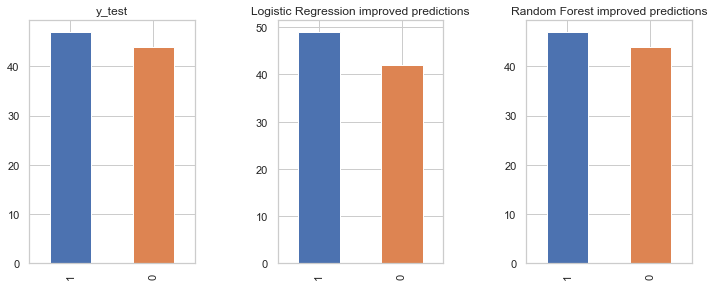

In [63]:
y_2_viz = pd.DataFrame(y_2) 
improved_predictions_LR_viz = pd.DataFrame(improved_predictions_LR, columns = ['target'])
improved_predictions_RF_viz = pd.DataFrame(improved_predictions_RF, columns = ['target'])

y_2_graph_LR = pd.value_counts(y_2_viz['target'])
improved_predictions_LR_graph = pd.value_counts(improved_predictions_LR_viz['target'])
improved_predictions_RF_graph = pd.value_counts(improved_predictions_RF_viz['target'])

models = ['y_test', 'LR_init', 'LR_impr', 'RF_init', 'RF_impr']
y_res_improved = y_2_graph_LR.tolist()
LR_res_improved = improved_predictions_LR_graph.tolist()
RF_res_improved = improved_predictions_RF_graph.tolist()
lst_improved = [y_res_improved, LR_res_initial, LR_res_improved, RF_res_initial, RF_res_improved]
lst_positive_improved = [item[0] for item in lst_improved]
lst_negative_improved = [item[1] for item in lst_improved]
df_results_improved = pd.DataFrame({'Model':models, 'Positive':lst_positive_improved, 'Negative':lst_negative_improved}, 
                          columns=['Model','Positive','Negative'])
print(df_results_improved)

fig, ax = plt.subplots(ncols=3, figsize=(10,4))
fig.tight_layout()
plt.subplots_adjust (left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

plot = y_2_graph_LR.plot.bar(ax=ax[0])
#plot.invert_yaxis()
plot1 = improved_predictions_LR_graph.plot.bar(ax=ax[1])
#plot1.invert_yaxis()
plot2 = improved_predictions_RF_graph.plot.bar(ax=ax[2])
#plot1.invert_yaxis()

plot.title.set_text('y_test')
plot1.title.set_text('Logistic Regression improved predictions')
plot2.title.set_text('Random Forest improved predictions')

plt.show()

The performance of the improved LR model is 97%, and the performance of the imporved RF model is 100%, compared to 92% and 95% of initial LR and RF models respectively. 

## 4. Conclusion

As a result, the real performance of the improved LR model grew to 97% from the initial LR's model score of 92%, and thus the improved LR model reached the level of performance higher than that of the initial RF model. At the same time, the improved RF model's performance grew to 100%, and is therefore recommended for usage within the decision support system. Overall, the performance of improved LR and RF models - 97% and 100% respectively - is excellent, and higher than that of the average healthcare decision support system - 90% - as well as the average doctor's performance of up to 94% [8].

[8] Doctors, beware: A 'robot doctor' just matched humans' diagnostic performance https://www.advisory.com/daily-briefing/2019/02/13/ai-diagnosis 